# Diabeties prediction

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
sns.set_style("dark")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [116]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
[col for col in df.columns if df[col].isna().any()]  # columns with missising value

[]

In [118]:
df.apply(lambda x:len(x.unique()))  # unique value in columns

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [119]:
df.dtypes  # data types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [120]:
df.shape

(768, 9)

In [121]:
X=df.drop('Outcome',axis=1)  #independent variable
y=df.Outcome  # dependent variable

In [122]:
X.corr()  # correlation between features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


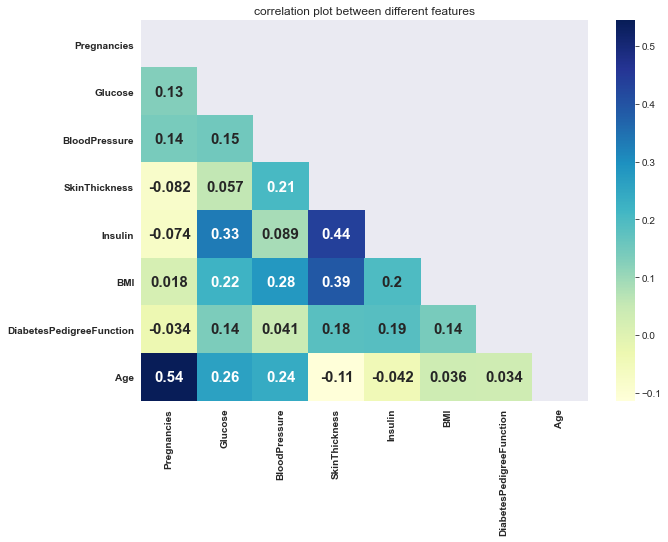

In [123]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True,mask=np.triu(np.ones_like(X.corr())),cmap="YlGnBu",annot_kws={'fontweight':'bold','size':15})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('correlation plot between different features');

we can see from above heatmap there is corrrelation between
- age and Pregnancies
- bmi and skinthickness
- insulin and skinthickness
- insulin and glucose

In [124]:
# I will make custom function to create scatter plot
def scatter_plot(df,col1,col2):
   
    plt.figure(figsize=(10,7))
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col1],df[col2])

    sns.regplot(df[col1],df[col2],color='red',ci=None,
               line_kws={'label':f'y={round(slope,2)}x + {round(intercept,2)}','color':'green'})
    plt.xlabel(col1,fontweight='bold')
    plt.ylabel(col2,fontweight='bold')
    plt.title(f' scatter plot between {col1} and {col2}',fontweight='bold')
    plt.legend()

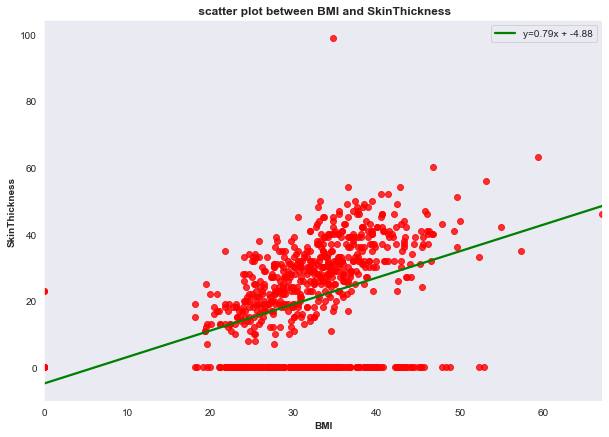

In [125]:
scatter_plot(X,'BMI','SkinThickness')

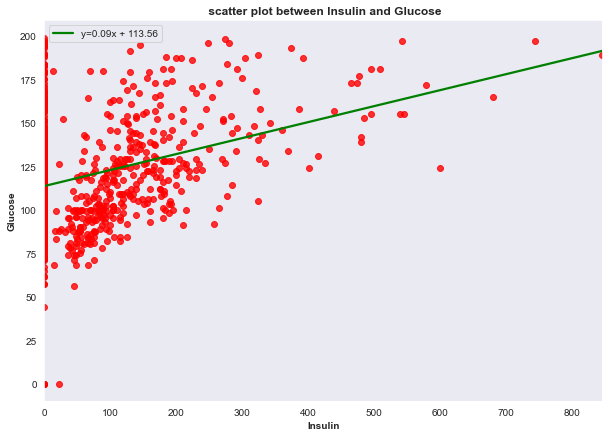

In [126]:
scatter_plot(X,'Insulin','Glucose')

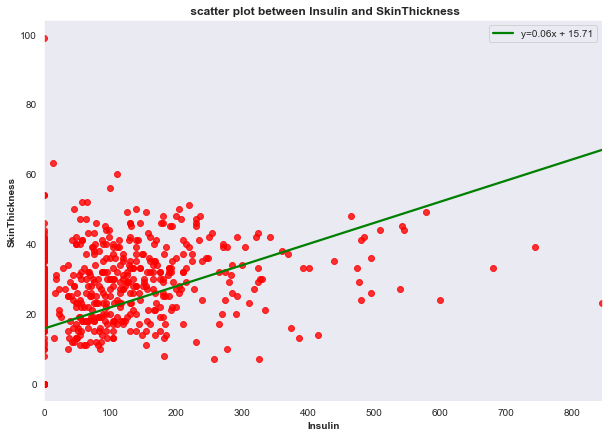

In [127]:
scatter_plot(X,'Insulin','SkinThickness')

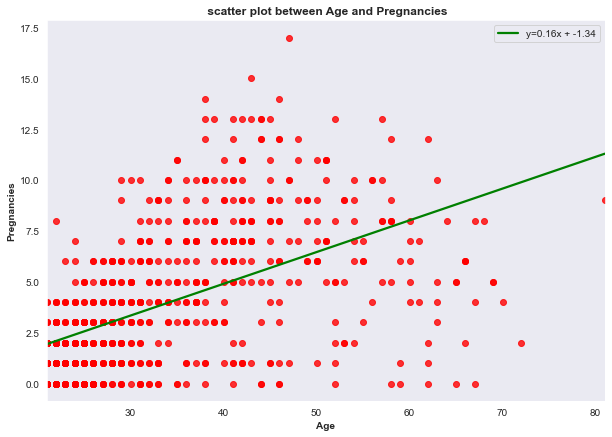

In [128]:

    
    
scatter_plot(X,'Age','Pregnancies')

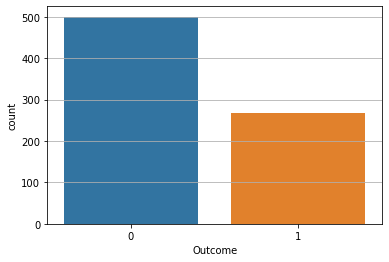

In [53]:
#this is target that we need to predict
# here 0 means person does have diabeties
# here 1 means person have diabeties
sns.countplot(data=df,x='Outcome')
plt.grid(axis='y');

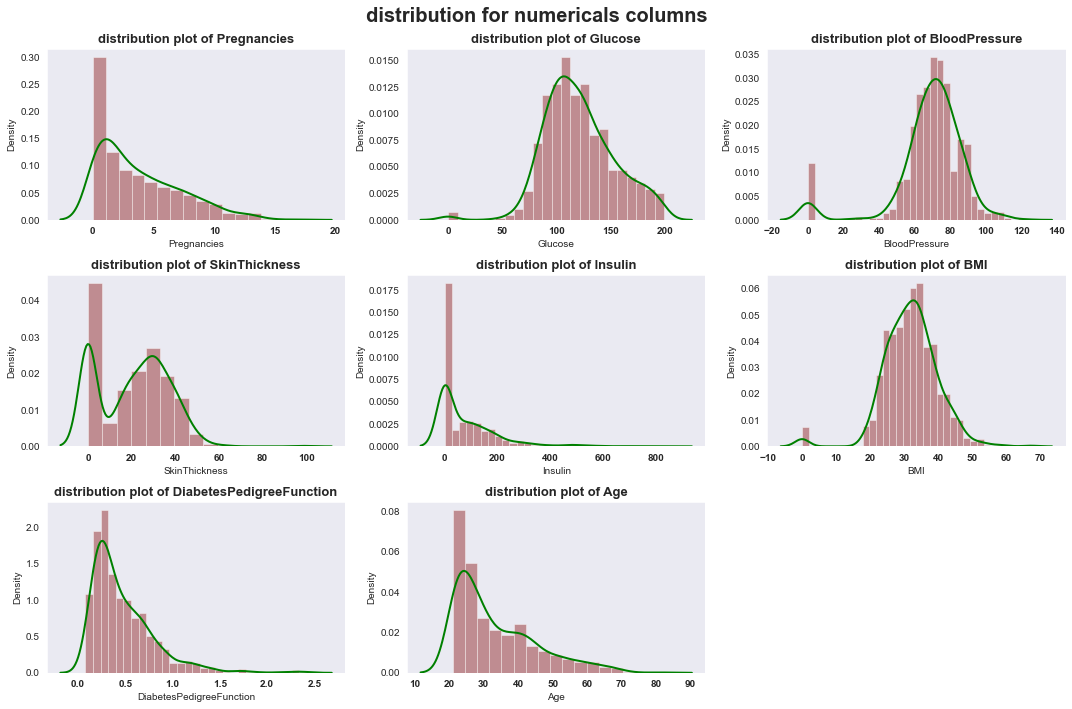

In [129]:
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns):
  plt.suptitle('distribution for numericals columns',fontweight='bold',fontsize=20)
  plt.subplot(3,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.distplot(X[col],color='maroon',kde_kws={'linewidth':2,'color':'green'})
  plt.title(f'distribution plot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

Most of the data are right skewed indicating outliers in right part

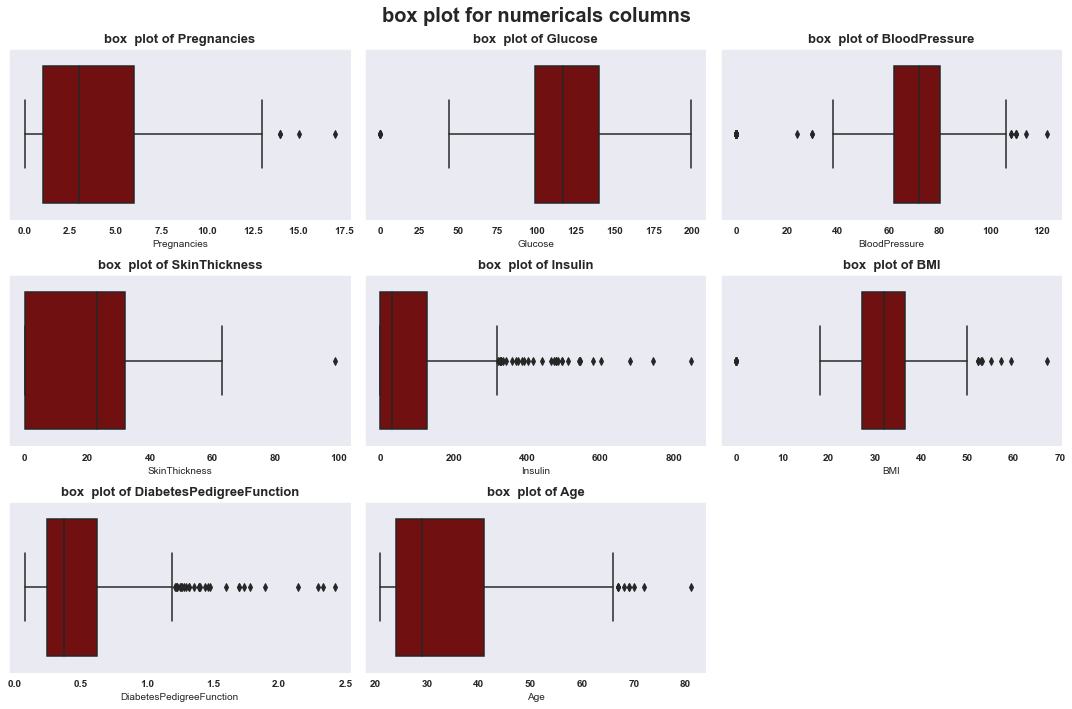

In [130]:
#lets used box plot to see ouliers in each columns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns):
  plt.suptitle('box plot for numericals columns',fontweight='bold',fontsize=20)
  plt.subplot(3,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.boxplot(X[col],color='maroon')
  plt.title(f'box  plot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

In [133]:
def outlier(col):
    #fig,(ax1,ax2)=plt.subplots(2,1)
    #sns.boxplot(X[col],ax=ax1,color='maroon')
    #ax1.set_title(f' {col} column before removing outliers')
    q1=X[col].quantile(0.25)
    q3=X[col].quantile(0.75)
    IQR=q3-q1
    ub=1.5*IQR+q3
    lb=q1-1.5*IQR
    X[col]=np.where(X[col]>ub,ub,np.where(X[col]<lb,lb,X[col]))
    #sns.boxplot(X[col],ax=ax2)
    #ax2.set_title(f'{col} column after removing outliers')
    #plt.tight_layout()

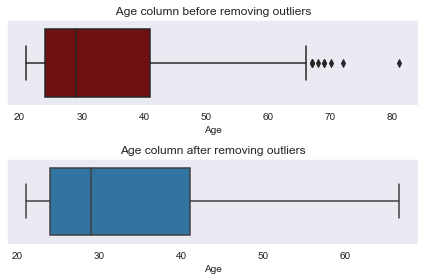

In [132]:
outlier('Age')

In [134]:
for i in  X.columns:  # applying function
    outlier(i)

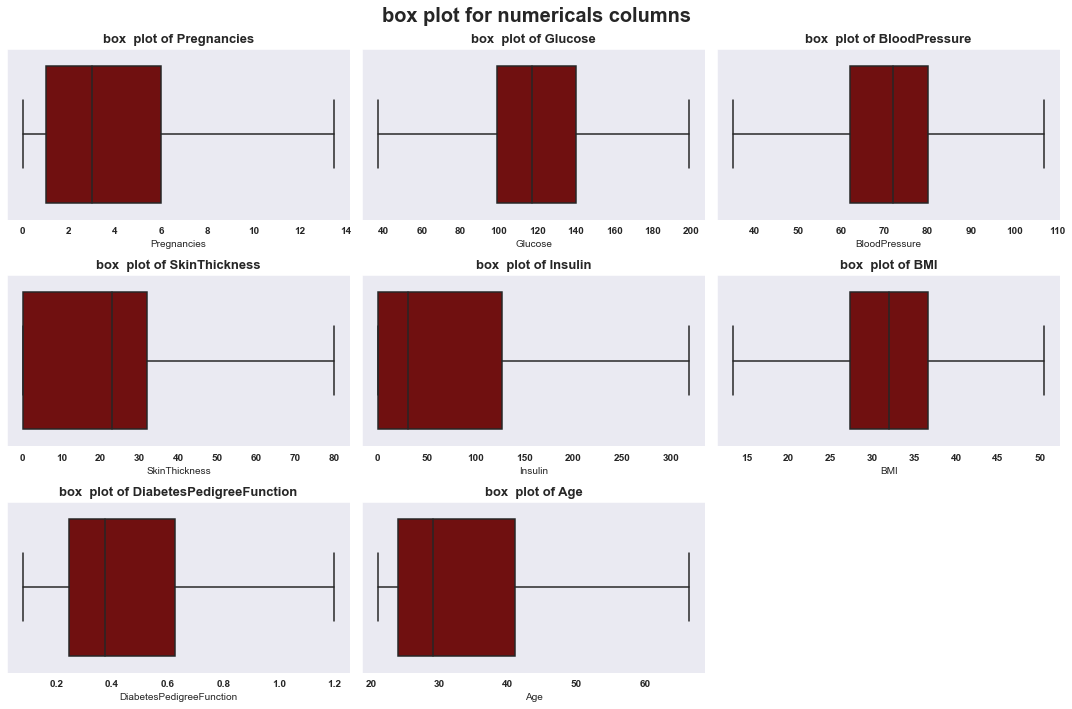

In [135]:
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns):
  plt.suptitle('box plot for numericals columns',fontweight='bold',fontsize=20)
  plt.subplot(3,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.boxplot(X[col],color='maroon')
  plt.title(f'box  plot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier



# Model selection

In [58]:
minmax=MinMaxScaler()
kfold=KFold(n_splits=5,shuffle=True,random_state=0)  # sratified k fold cross validation

In [ ]:
# i defined custom function for model selection
def classifier(x):
    my_pipeline = Pipeline(steps=[('minmax',MinMaxScaler(),
                                      ('model',x)
                                     ])
    scores = cross_val_score(my_pipeline, X, y,
                                      cv=kfold,
                                      scoring='accuracy')
    return f' mean score of {x} is {np.mean(scores)}'

# Random Forest Classifier

In [68]:
classifier(RandomForestClassifier())

' mean score of RandomForestClassifier() is 0.7695356930651048'

# Knn Neighbours

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier(KNeighborsClassifier())

' mean score of KNeighborsClassifier() is 0.7499872676343264'

# Xgboost Classifier

In [71]:
from xgboost import XGBClassifier
classifier(XGBClassifier(use_label_encoder=False ))

[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

" mean score of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,\n              colsample_bynode=None, colsample_bytree=None, gamma=None,\n              gpu_id=None, importance_type='gain', interaction_constraints=None,\n              learning_rate=None, max_delta_step=None, max_depth=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              n_estimators=100, n_jobs=None, num_parallel_tree=None,\n              random_state=None, reg_alpha=None, reg_lambda=None,\n              scale_pos_weight=None, subsample=None, tree_method=None,\n              use_label_encoder=False, validate_parameters=None,\n              verbosity=None) is 0.7408539173245056"

# Neural network,MLP classifier

In [72]:
from sklearn.neural_network import MLPClassifier
classifier(MLPClassifier())

C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sabin Sapkota\Anaconda3\lib\sit

' mean score of MLPClassifier() is 0.7733638910109498'

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
classifier(LogisticRegression())


' mean score of LogisticRegression() is 0.772099142687378'

# Support vector classifier

In [74]:
from sklearn.svm import SVC
classifier(SVC())

' mean score of SVC() is 0.7564722858840506'

# Hypertunning for Random forest Classifier

Now, we can see Random Forest classifier and logistic regression gives high score.so I will hypertune this model

In [81]:
model=RandomForestClassifier()
params={
    'model__n_estimators':[int(x) for x in np.linspace(100,1000,10)],
     'model__max_depth':[int(x) for x in np.linspace(1,5,5)],
    'model__min_samples_split':[int(x) for x in np.linspace(2,10,10)]
    
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
my_pipeline = Pipeline(steps=[('minmax',MinMaxScaler()),
                              ('model',model)])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=params,n_iter=5,scoring='accuracy',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [83]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('minmax', MinMaxScaler()),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__max_depth': [1, 2, 3, 4, 5],
                                        'model__min_samples_split': [2, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000]},
                   scoring='accuracy', verbose=1)

In [84]:
random_search.best_params_

{'model__n_estimators': 900,
 'model__min_samples_split': 4,
 'model__max_depth': 5}

In [85]:
random_search.best_score_

0.7695272048213224

# Hypertunning for Logistic Regression

In [98]:
model=LogisticRegression()
params={'model__C':[float(x) for x in np.linspace(1,20,10)]
    
}

In [99]:
my_pipeline = Pipeline(steps=[('minmax',MinMaxScaler()),
                              ('model',model)])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=params,n_iter=5,scoring='accuracy',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [100]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('minmax', MinMaxScaler()),
                                             ('model', LogisticRegression())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__C': [1.0, 3.111111111111111,
                                                     5.222222222222222,
                                                     7.333333333333334,
                                                     9.444444444444445,
                                                     11.555555555555555,
                                                     13.666666666666668,
                                                     15.777777777777779,
                                                     17.88888888888889, 20.0]},
                   scoring='accuracy', verbose=1)

In [101]:
random_search.best_params_

{'model__C': 9.444444444444445}

In [102]:
random_search.best_score_

0.7734063322298617

In [157]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model=RandomForestClassifier(max_depth=5,n_estimators=900,min_samples_split=4)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=900)

In [114]:
model.score(X_test,y_test)

0.8246753246753247

In [115]:
model.score(X_train,y_train)

0.8436482084690554

In [111]:
y_pred=model.predict(X_test)

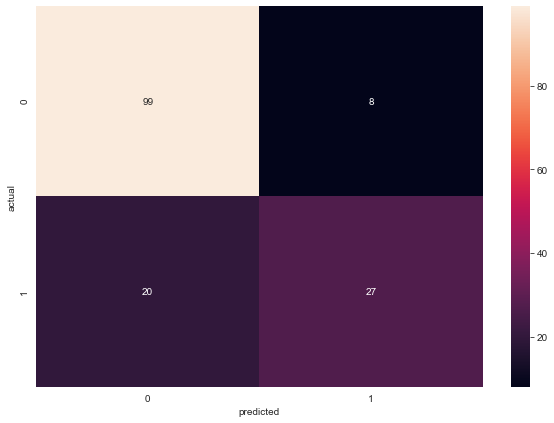

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual');